# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading data

In [2]:
df = pd.read_csv('all_data.csv')
df.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.shape

(96, 4)

It seems that there are 96 observations of rows and 4 columns. 

## Explore the Data

In [4]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The countries that are represented in the data : Chile, China, Germany, Mexico, United States of America, Zimbabwe
Years that represented in the data are 2000-2015.


#### Cleanig column names

In [5]:
df = df.rename({'Life expectancy at birth (years)' : 'LEBY'}, axis='columns')
df.head()

,Country,Year,LEBY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploratory plots

First I'm going to examin the destribution of GDP and LEBY below.

<Figure size 576x432 with 0 Axes>

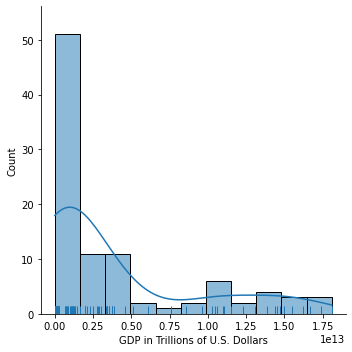

In [6]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug=True, kde=True)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

Text(0.5, 6.79999999999999, 'Life Expectancy At Birth (Year)')

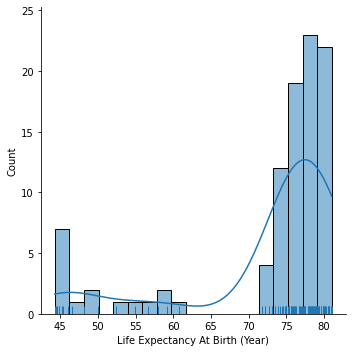

In [7]:
sns.displot(df.LEBY, rug=True, kde=True)
plt.xlabel("Life Expectancy At Birth (Year)")


The previous plots did not break up the data by countries, so the next task will be to find the average `LEBY` and `GDP` by country.

In [8]:
dfmeans = df.drop('Year', axis=1).groupby('Country').mean().reset_index()

dfmeans

,Country,LEBY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now that they are broken down by `Country` and the average values for `LEBY` and `GDP` are created, bar plots showing the mean values for each variable are created below.

Text(0.5, 0, 'Life expectancy at birth (years)')

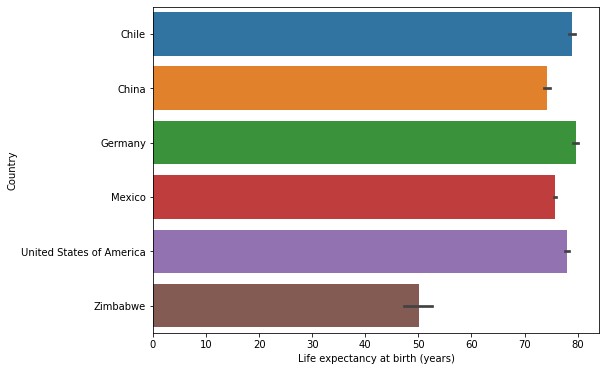

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='LEBY', y='Country')
plt.xlabel('Life expectancy at birth (years)')

The plot above is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

Text(0.5, 0, 'GDP in Trillions of U.S. dollars')

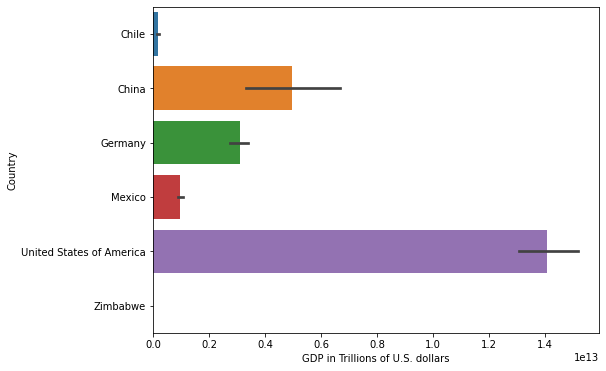

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='GDP', y='Country')
plt.xlabel('GDP in Trillions of U.S. dollars')

For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

### Violin Plots

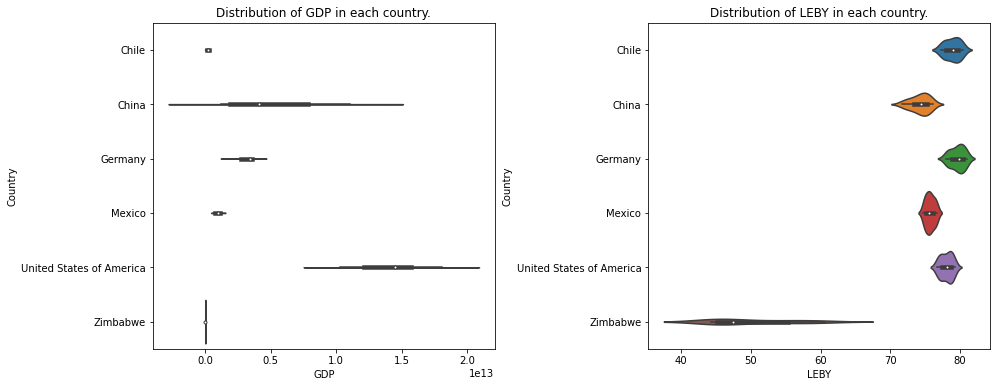

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.violinplot(data=df, y='Country', x='GDP')
plt.title('Distribution of GDP in each country.')
plt.subplot(1,2,2)
sns.violinplot(data=df, y='Country', x='LEBY')
plt.title('Distribution of LEBY in each country.')
plt.subplots_adjust(wspace=0.45)


In the GDP plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges.

In the LEBY plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

### swarm plots

Another newer method for showing distributions is the swarm plot, and they can be used to complement the box and violin plots. Swarm plots are useful because they show dot density around the values as well as distribution through area/shape.

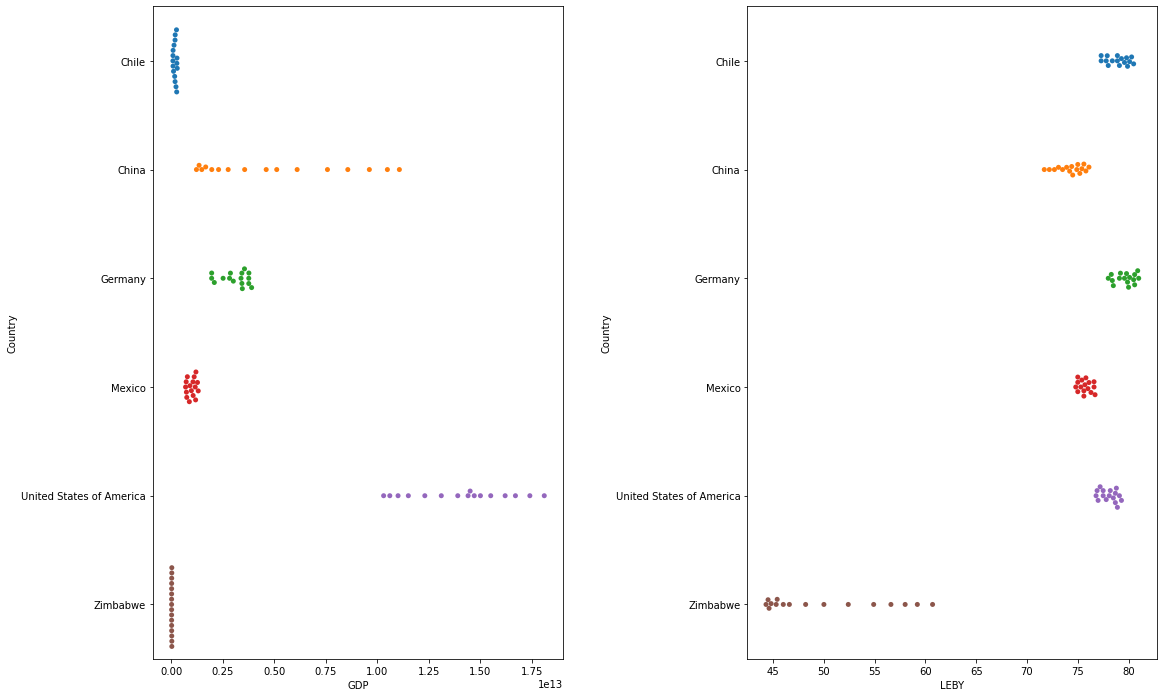

In [12]:
plt.subplots(figsize=(18, 12))
plt.subplot(1,2,1)
sns.swarmplot(data=df, y='Country', x='GDP')
plt.subplot(1,2,2)
sns.swarmplot(data=df, y='Country', x='LEBY')
plt.subplots_adjust(wspace=0.45)

In the case of of the GDP plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations.

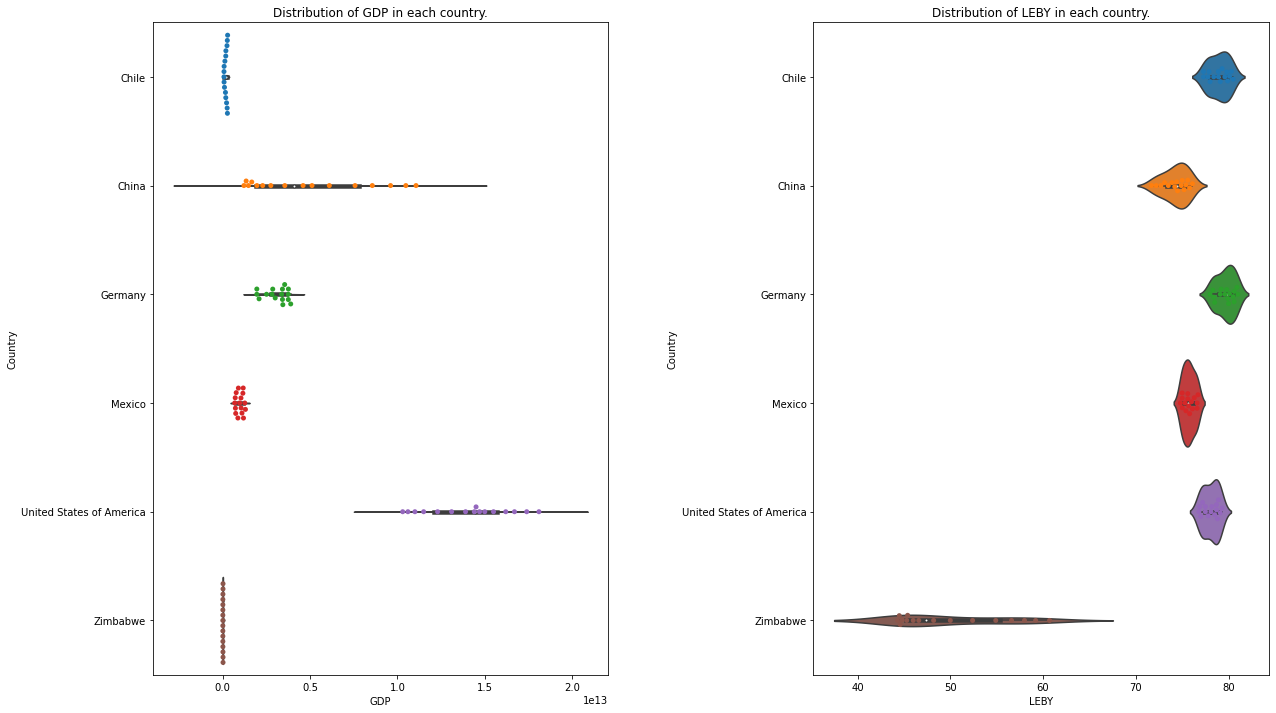

In [13]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.violinplot(data=df, y='Country', x='GDP')
sns.swarmplot(data=df, y='Country', x='GDP')
plt.title('Distribution of GDP in each country.')
plt.subplot(1,2,2)
sns.violinplot(data=df, y='Country', x='LEBY')
sns.swarmplot(data=df, y='Country', x='LEBY')
plt.title('Distribution of LEBY in each country.')
plt.subplots_adjust(wspace=0.45)

### Line charts

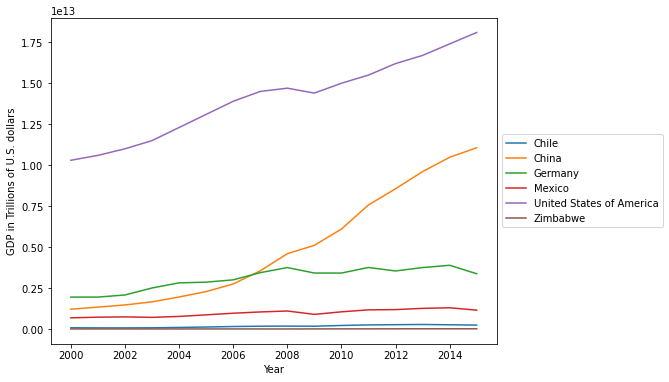

In [14]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, y='GDP', x='Year', hue='Country')
plt.ylabel('GDP in Trillions of U.S. dollars')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The data has explore GDP and LEABY over the years through line charts. Countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

### Faceted line charts

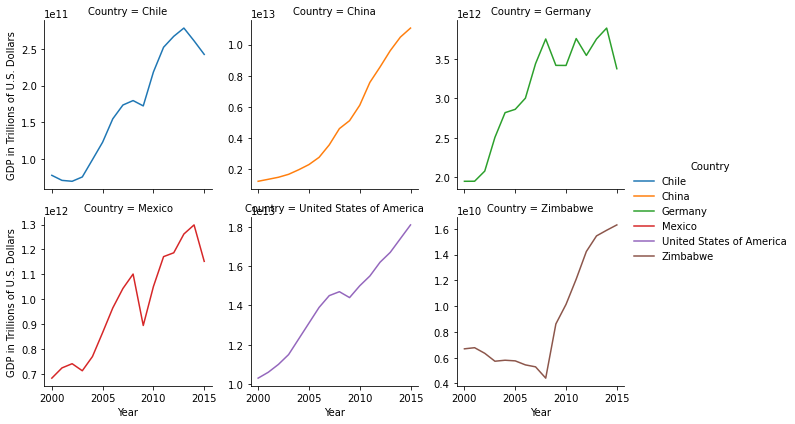

In [15]:
graphGDP = sns.FacetGrid(data=df, col='Country', col_wrap=3, hue='Country', sharey=False )

graphGDP = graphGDP.map(sns.lineplot,'Year', 'GDP').add_legend().set_axis_labels('Year', 'GDP in Trillions of U.S. Dollars')

graphGDP

### scatterplot

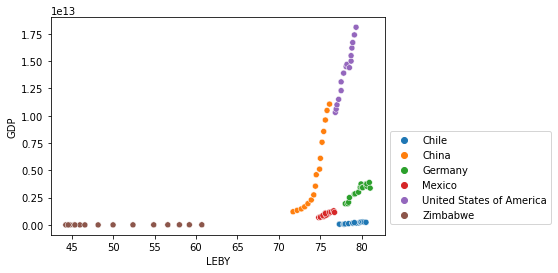

In [16]:
sns.scatterplot(data=df, x='LEBY', y='GDP', hue='Country')
plt.legend(bbox_to_anchor=(1, 0.5), ncol=1)

This chart has explored the relationship between `GDP` and `LEBY`. It looks like GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

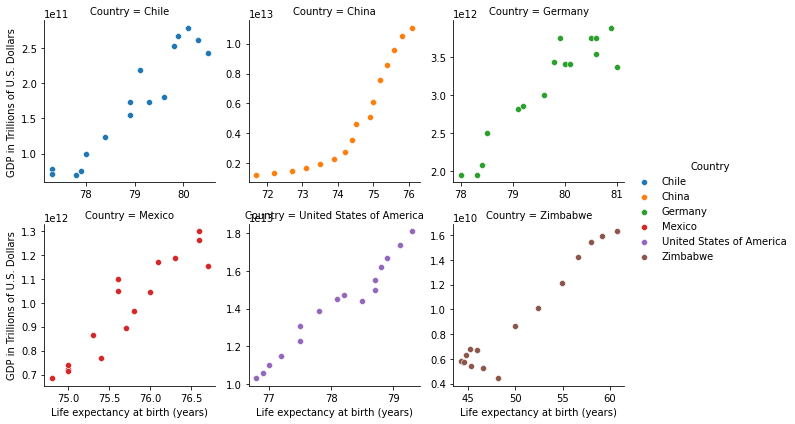

In [17]:
graph = sns.FacetGrid(data=df, col='Country', col_wrap = 3, hue='Country', sharey=False, sharex=False)

graph= graph.map(sns.scatterplot, 'LEBY', 'GDP').add_legend().set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars")

graph

Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

## Conclusion

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

The project was also able to answer some of the questions posed in the beginning:

Has life expectancy increased over time in the six nations?
Yes with Zimbabwe having the greatest increase.

Has GDP increased over time in the six nations?
GDP has also increased for all countries in our list, especially for China.

Is there a correlation between GDP and life expectancy of a country?
Yes there is a positive correlation between GDP and life expectancy for countries in our list.

What is the average life expectancy in these nations?
Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.

What is the distribution of that life expectancy?
the life expectancy had a left skew, or most of the observations were on the right side.